In [2]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#!unzip /content/drive/MyDrive/Dataset/Rice_Image_Data.zip -d /content/drive/MyDrive/Dataset/


In [4]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import pathlib
import cv2
import os
import numpy as np
import pandas as pd
from pathlib import Path
import splitfolders
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [6]:
ds = '/content/drive/MyDrive/Dataset/Rice_Image_Dataset'
ds = pathlib.Path(ds)
ds

PosixPath('/content/drive/MyDrive/Dataset/Rice_Image_Dataset')

In [7]:
image_link = list(Path('/content/drive/MyDrive/Dataset/Rice_Image_Dataset').glob('*/*.jpg'))
image_name = [x.parents[0].stem for x in image_link]


In [8]:
import numpy as np
df = pd.DataFrame()
df['link'] = np.array(image_link, dtype = str)
df['name'] = image_name
df

,link,name
0,/content/drive/MyDrive/Dataset/Rice_Image_Data...,Arborio
1,/content/drive/MyDrive/Dataset/Rice_Image_Data...,Arborio
2,/content/drive/MyDrive/Dataset/Rice_Image_Data...,Arborio
3,/content/drive/MyDrive/Dataset/Rice_Image_Data...,Arborio
4,/content/drive/MyDrive/Dataset/Rice_Image_Data...,Arborio
...,...,...
74995,/content/drive/MyDrive/Dataset/Rice_Image_Data...,Karacadag
74996,/content/drive/MyDrive/Dataset/Rice_Image_Data...,Karacadag
74997,/content/drive/MyDrive/Dataset/Rice_Image_Data...,Karacadag
74998,/content/drive/MyDrive/Dataset/Rice_Image_Data...,Karacadag


In [9]:
df.name.value_counts()

Arborio      15000
Basmati      15000
Ipsala       15000
Jasmine      15000
Karacadag    15000
Name: name, dtype: int64

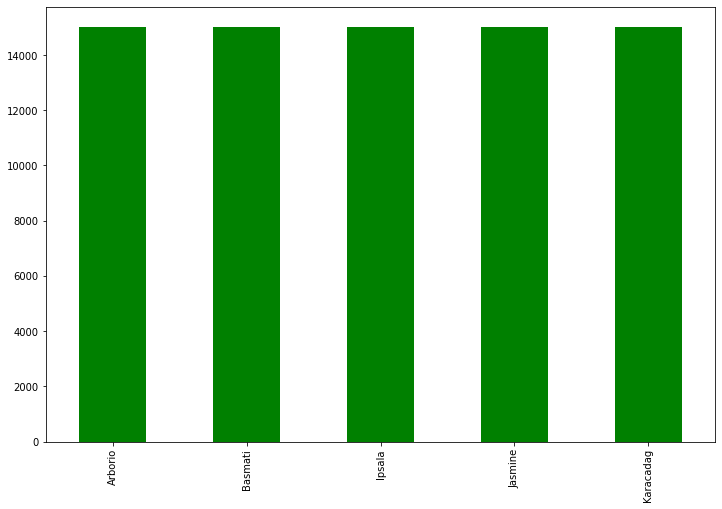

In [10]:
df.name.value_counts().plot(kind = 'bar', figsize = (12, 8),  color = 'green')

In [31]:
# import matplotlib.pyplot as plt
# image=Image.open("/content/drive/MyDrive/Dataset/Rice_Image_Dataset/Arborio/Arborio (1000).jpg")
# plt.imshow("Basmati (1).jpg")
from PIL import Image
im = Image.open('/content/drive/MyDrive/Dataset/Rice_Image_Dataset/Arborio/Arborio (1000).jpg')
im.show()

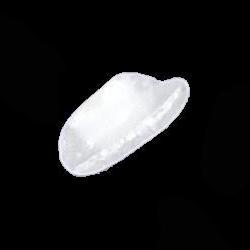

In [33]:
im

In [11]:
splitfolders.ratio(ds, output='imgs', seed=123, ratio=(.7,.1,.2) )

Copying files: 75000 files [22:33, 55.40 files/s] 


In [12]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state =1 )

In [13]:
train_images = ImageDataGenerator().flow_from_dataframe(
    dataframe = train_df,
    x_col = 'link',
    y_col = 'name',
    color_mode = 'rgb',
    batch_size= 32,
    target_size=(224,224),
    class_mode = 'categorical',
    subset = 'training'

)

test_images = ImageDataGenerator().flow_from_dataframe(
    dataframe = test_df,
    x_col = 'link',
    y_col = 'name',
    color_mode = 'rgb',
    batch_size = 32,
    target_size=(224,224),
    class_mode = 'categorical'
)

Found 52500 validated image filenames belonging to 5 classes.
Found 22500 validated image filenames belonging to 5 classes.


In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape = (224,224, 3),activation = 'relu'),tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation = 'relu'),tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')
])

In [17]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history=model.fit(train_images, epochs = 3)
model.summary()

Epoch 1/3
1641/1641 [==============================] - 168s 102ms/step - loss: 0.0400 - accuracy: 0.9882
Epoch 2/3
1641/1641 [==============================] - 166s 101ms/step - loss: 0.0253 - accuracy: 0.9926
Epoch 3/3
1641/1641 [==============================] - 160s 97ms/step - loss: 0.0176 - accuracy: 0.9945
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)  

In [19]:
result=model.evaluate(test_images)

704/704 [==============================] - 72s 102ms/step - loss: 0.0928 - accuracy: 0.9821


In [20]:
print("Test Loss: {:.5f}".format(result[0]))
print("Accuracy on the test set: {:.2f}%".format(result[1]*100))

Test Loss: 0.09283
Accuracy on the test set: 98.21%


In [22]:
model.save('/content/drive/MyDrive/Rice_Result.h5')

In [4]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Rice_Result.h5')

In [6]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
from keras.preprocessing import image
import keras.utils as image

test_image = image.load_img('/content/drive/MyDrive/Dataset/test/test1.jpg', target_size = (64, 64)) 
test_image = image.img_to_array('test1.jpg')
test_image = np.expand_dims('test1.jpg', axis = 0)

#predict the result
result = model.predict('test1.jpg')

ValueError: ignored